In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, \
                    Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, \
                    regularizers, metrics

In [2]:
b_size = 5
train_datagen = ImageDataGenerator(rescale=1./255, \
                                horizontal_flip=True,\
                        # 수평 대칭 이미지를 50% 확률로 만듬
                                 width_shift_range=0.1,\
                        # 전체 크기의 10% 범위에서 좌우로 이동
                                 height_shift_range=0.1,\
                                 fill_mode='nearest')

In [3]:
train_generator = train_datagen.flow_from_directory(
                            'train',
                            target_size=(150,150),
                            batch_size=b_size,
                            class_mode='binary')

Found 160 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                            'test',
                            target_size=(150,150),
                            batch_size=b_size,
                            class_mode='binary')

Found 120 images belonging to 2 classes.


In [5]:
print(len(train_generator))

32


In [6]:
print(len(test_generator))

24


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [12]:
# 컴파일
model.compile(loss='sparse_categorical_crossentropy', \
             optimizer=optimizers.Adam(learning_rate=0.0002), \
             metrics=['accuracy'])

In [13]:
steps_train = len(train_generator)
steps_test = len(test_generator)

In [14]:
history = model.fit(
       train_generator,
       steps_per_epoch=steps_train,
       epochs=20,
       validation_data=test_generator,
       validation_steps=steps_test )

Epoch 1/20
32/32 [==============================] - 4s 100ms/step - loss: 0.7046 - accuracy: 0.4688 - val_loss: 0.6886 - val_accuracy: 0.5250
Epoch 2/20
32/32 [==============================] - 3s 81ms/step - loss: 0.6951 - accuracy: 0.4938 - val_loss: 0.6837 - val_accuracy: 0.5917
Epoch 3/20
32/32 [==============================] - 3s 82ms/step - loss: 0.6875 - accuracy: 0.5437 - val_loss: 0.6789 - val_accuracy: 0.5833
Epoch 4/20
32/32 [==============================] - 3s 83ms/step - loss: 0.6767 - accuracy: 0.6187 - val_loss: 0.6742 - val_accuracy: 0.5083
Epoch 5/20
32/32 [==============================] - 3s 89ms/step - loss: 0.6694 - accuracy: 0.5688 - val_loss: 0.6432 - val_accuracy: 0.7500
Epoch 6/20
32/32 [==============================] - 3s 88ms/step - loss: 0.6488 - accuracy: 0.6750 - val_loss: 0.6218 - val_accuracy: 0.6000
Epoch 7/20
32/32 [==============================] - 3s 90ms/step - loss: 0.6266 - accuracy: 0.6500 - val_loss: 0.6388 - val_accuracy: 0.5917
Epoch 8/20
3

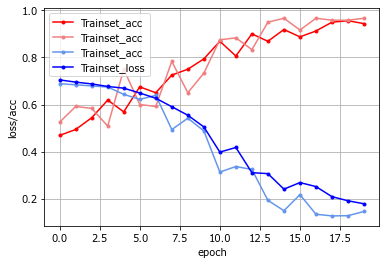

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', \
         label='Trainset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', \
         label='Trainset_acc')
plt.plot(x_len, y_loss, marker='.', c='blue', \
         label='Trainset_loss')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()